<h2>Lab 3 </h2>
<h3>Part 2: Language Modeling / Classification </h3>
<hr style="border:2px solid blue;">

<h3>Realised by:</h3>
<ul>
    <li><strong style="color:black;">ELMRABET HANAE</strong></li>
</ul>

<h3>Guided by:</h3> 
   <p><strong style="color:blue;">Pr . ELAACHAk LOTFy</strong></p>

<h1 style="color:black">DATASET</h1>
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

#      Question 

<ul>
    <ol><strong style="color:black;">1. Establish a preprocessing NLP pipeline (Tokenization stemming lemmatization, Stop words, Discretization, etc) of the collected Dataset..</strong></ol>
    <ol><strong style="color:black;">2. Encode your Data vectors By using Word2vec (CBOW, Skip Gram), Bag Of words, TF-IDF.</strong></ol>
    <ol><strong style="color:black;">3. Train your models by using SVM, Naive Bayes, Logistic Regression, Ada Boosting
Algorithms (The embedding will be done by Word2Vec).</strong></ol>
    <ol><strong style="color:black;">4. Evaluate the four languages models by using standards metrics (Accuracy, Loss, F1 Score,etc) and other metrics like blue score, choose the best model then argument your choice ..</strong></ol>
    <ol><strong style="color:black;">5. Interpret the Obtained Results.</strong></ol>
</ul>


In [54]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [64]:
train_data = pd.read_csv('twitter_validation.csv', names=['Tweet ID', 'Entity', 'Sentiment', 'Tweet content'])
validation_data = pd.read_csv('twitter_training.csv', names=['Tweet ID', 'Entity', 'Sentiment', 'Tweet content'])
data = pd.concat([train_data, validation_data], ignore_index = False)
data.head()

Tweet ID     Entity   Sentiment  \
0      3364   Facebook  Irrelevant   
1       352     Amazon     Neutral   
2      8312  Microsoft    Negative   
3      4371      CS-GO    Negative   
4      4433     Google     Neutral   

                                       Tweet content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...

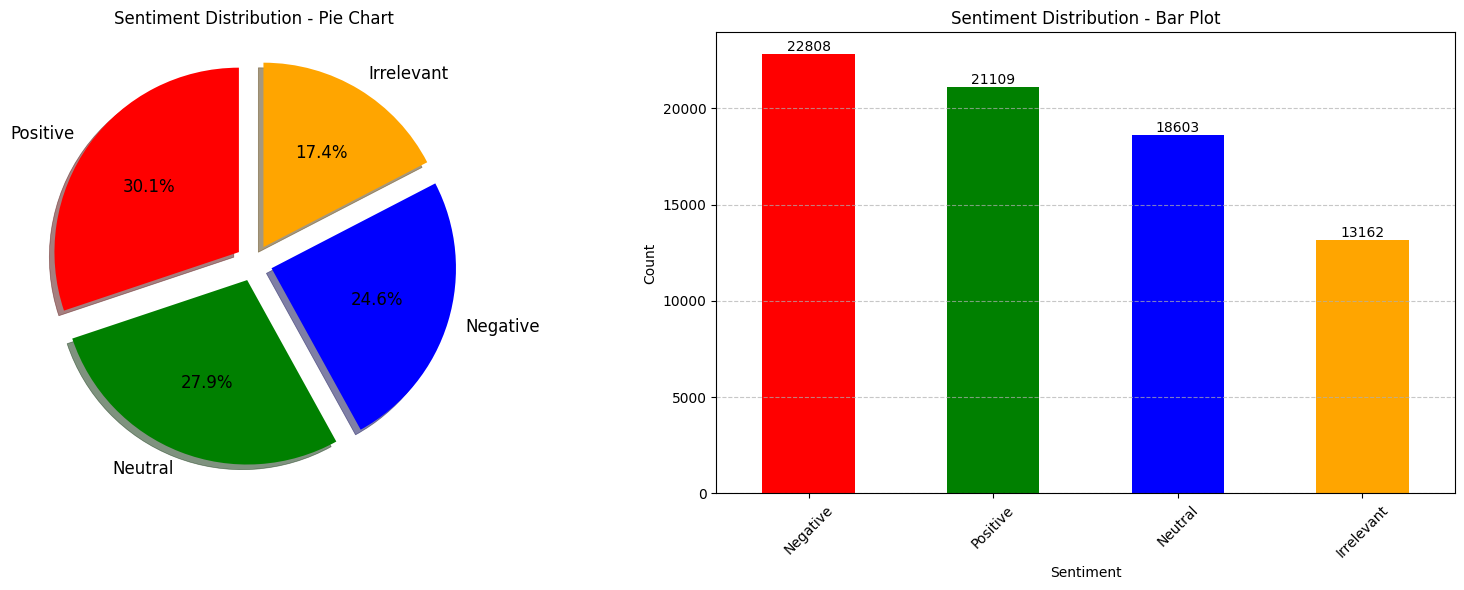

In [4]:
colors = ['red', 'green', 'blue', 'orange']
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(data['Sentiment'].value_counts(), labels = data['Sentiment'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

axs[1] = data['Sentiment'].value_counts().plot(kind = 'bar', color = colors, ax = axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [65]:
data.dropna(inplace = True)
data.isnull().sum()   

Tweet ID         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

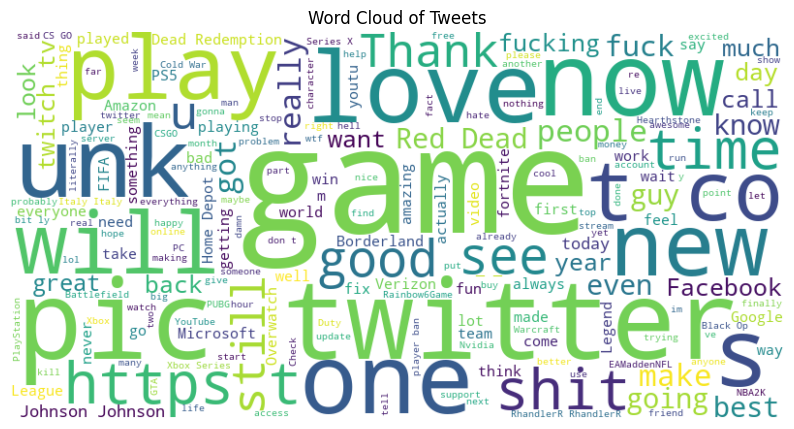

In [6]:
all_tweets = ' '.join(data['Tweet content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

In [66]:
remove_duplicates = data.drop_duplicates()
data = remove_duplicates
data.duplicated().sum()

0

In [67]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def filter_non_string(df, column):
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

def normalize_text(text):
    return text.lower()

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_emojis(tokens):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return [emoji_pattern.sub(r'', token) for token in tokens]

def preprocess_text(df):
    df = filter_non_string(df, 'Tweet content')
    df['Tweet content'] = df['Tweet content'].apply(normalize_text)
    df['Tweet content'] = df['Tweet content'].apply(remove_html_tags)
    df['Tweet content'] = df['Tweet content'].apply(remove_urls)
    df['Tweet content'] = df['Tweet content'].apply(remove_numbers)
    df['Tweet content'] = df['Tweet content'].apply(remove_punctuation)
    df['Tweet content'] = df['Tweet content'].apply(tokenize_text)
    df['Tweet content'] = df['Tweet content'].apply(remove_stopwords)
    df['Tweet content'] = df['Tweet content'].apply(remove_emojis)
    return df


In [68]:
data = preprocess_text(data)

In [69]:
data.head()

Tweet ID     Entity   Sentiment  \
0      3364   Facebook  Irrelevant   
1       352     Amazon     Neutral   
2      8312  Microsoft    Negative   
3      4371      CS-GO    Negative   
4      4433     Google     Neutral   

                                       Tweet content  
0  [mentioned, facebook, struggling, motivation, ...  
1  [bbc, news, amazon, boss, jeff, bezos, rejects...  
2  [microsoft, pay, word, functions, poorly, sams...  
3  [csgo, matchmaking, full, closet, hacking, tru...  
4  [president, slapping, americans, face, really,...

In [70]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(data['Tweet content'].apply(lambda x: ' '.join(x)))
print(tfidf_vectors[0])

  (0, 22919)	0.19312295442867025
  (0, 31435)	0.19052022725598677
  (0, 17490)	0.23787184233841957
  (0, 31854)	0.23744143933546916
  (0, 13044)	0.27345526696819955
  (0, 32305)	0.19888905150345076
  (0, 2667)	0.23498149282828204
  (0, 12408)	0.1194974438112275
  (0, 13743)	0.3109285300269272
  (0, 2036)	0.2988000579700611
  (0, 13092)	0.13527884994328399
  (0, 32312)	0.23498149282828204
  (0, 32572)	0.27977604867457695
  (0, 7383)	0.14548998257046994
  (0, 27481)	0.18583298596865558
  (0, 12751)	0.1382903399830703
  (0, 20076)	0.2780662980420079
  (0, 30415)	0.24633297333962306
  (0, 10346)	0.13944613973583936
  (0, 19251)	0.24411621916895923


In [71]:
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(data['Tweet content'].apply(lambda x: ' '.join(x)))
print(bow_vectors[0])

  (0, 19251)	1
  (0, 10346)	1
  (0, 30415)	1
  (0, 20076)	1
  (0, 12751)	1
  (0, 27481)	1
  (0, 7383)	1
  (0, 32572)	1
  (0, 32312)	1
  (0, 13092)	1
  (0, 2036)	1
  (0, 13743)	1
  (0, 12408)	1
  (0, 2667)	1
  (0, 32305)	1
  (0, 13044)	1
  (0, 31854)	1
  (0, 17490)	1
  (0, 31435)	1
  (0, 22919)	1


In [37]:
def text_to_vec(text, model):
    vecs = []
    for word in text:
        if word in model.key_to_index:
            vecs.append(model[word])
    if vecs:  
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

In [74]:
df = data.copy()
df['Tweet content'] = df['Tweet content'].apply(lambda x: text_to_vec(x, model))
vec_matrix = np.array(df['Tweet content'].tolist())
df.drop(['Tweet content'], axis=1, inplace=True)
final_df = df.join(pd.DataFrame(vec_matrix))
final_df.columns = final_df.columns.astype(str)

In [75]:
final_df.dropna(inplace = True)
final_df

Tweet ID                Entity   Sentiment         0         1  \
0          3364              Facebook  Irrelevant  0.057376  0.024659   
1           352                Amazon     Neutral -0.072342  0.089193   
2          8312             Microsoft    Negative  0.174707 -0.069336   
3          4371                 CS-GO    Negative  0.051392  0.015738   
4          4433                Google     Neutral  0.029436  0.005715   
...         ...                   ...         ...       ...       ...   
72134     11157  TomClancysGhostRecon    Positive -0.021451 -0.026622   
72135     11157  TomClancysGhostRecon    Positive -0.043616 -0.028772   
72136     11157  TomClancysGhostRecon    Positive -0.033948 -0.043054   
72137     11157  TomClancysGhostRecon    Positive -0.004857 -0.026446   
72138     11158  TomClancysGhostRecon    Positive  0.007800  0.012317   

              2         3         4         5         6  ...       290  \
0     -0.001575  0.099040 -0.033658  0.024084  0.073360  ... -0.023581   
1     -0.045134  0.015656  0.042623  0.000547  0.001770  ...  0.014508   
2     -0.049500  0.074097 -0.149609 -0.004248 -0.007837  ... -0.065308   
3     -0.069772  0.047376  0.020717  0.161063 -0.003278  ... -0.015817   
4      0.073375  0.055065 -0.160134 -0.047710  0.026259  ...  0.006429   
...         ...       ...       ...       ...       ...  ...       ...   
72134  0.024010  0.088419 -0.080378  0.054049  0.122599  ... -0.124221   
72135  0.017480  0.079243 -0.083948  0.031598  0.112398  ... -0.119128   
72136  0.026709  0.079097 -0.088391  0.048761  0.115132  ... -0.136511   
72137  0.042809  0.117463 -0.091195  0.040506  0.096171  ... -0.135339   
72138  0.025626  0.067476 -0.071472  0.066339  0.126704  ... -0.129378   

            291       292       293       294       295       296       297  \
0      0.088409 -0.142572 -0.010318 -0.078226 -0.053967  0.015200 -0.097760   
1      0.090210 -0.129196  0.118388 -0.006714 -0.002660  0.012370  0.017324   
2      0.040900 -0.042285  0.079883  0.073730 -0.026758 -0.126769 -0.047607   
3      0.065011 -0.102260  0.023420 -0.020647 -0.083670  0.141854 -0.006880   
4      0.111728 -0.089543  0.001630 -0.119207 -0.057933  0.034879 -0.069070   
...         ...       ...       ...       ...       ...       ...       ...   
72134  0.137362 -0.010010 -0.016572 -0.008007 -0.039773 -0.026434 -0.049577   
72135  0.143604 -0.002246 -0.022258 -0.026947 -0.045508 -0.058032 -0.060004   
72136  0.146826 -0.007251 -0.023185 -0.003632 -0.039404 -0.041040 -0.058929   
72137  0.133545 -0.052543  0.012335 -0.039982 -0.065186 -0.046099 -0.030112   
72138  0.104395 -0.023853 -0.015063  0.020880 -0.037817 -0.009009 -0.051544   

            298       299  
0      0.053845  0.012573  
1     -0.017075 -0.018372  
2     -0.004364  0.003760  
3     -0.092913  0.105399  
4      0.094333  0.022261  
...         ...       ...  
72134 -0.035356  0.014686  
72135 -0.041138 -0.004883  
72136 -0.024341  0.009026  
72137 -0.040135 -0.019484  
72138 -0.045435  0.028801  

[69724 rows x 303 columns]

In [40]:
X = final_df.drop(['Tweet ID', 'Sentiment', 'Entity'], axis = 1)
y = final_df['Sentiment']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {'Accuracy': accuracy_score(y_test, lr_pred),'F1 Score': f1_score(y_test, lr_pred, average='weighted'),'Precision': precision_score(y_test, lr_pred, average='weighted'),'Recall': recall_score(y_test, lr_pred, average='weighted')}

In [52]:
param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 10],'gamma': ['scale', 'auto']}
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train, y_train)
best_svm_pred = best_svm_model.predict(X_test)
svm_metrics = {'Accuracy': accuracy_score(y_test, best_svm_pred),'F1 Score': f1_score(y_test, best_svm_pred, average='weighted'),'Precision': precision_score(y_test, best_svm_pred, average='weighted'),'Recall': recall_score(y_test, best_svm_pred, average='weighted')}

In [51]:
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50],'min_samples_split': [2, 5, 10, 20, 30],'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
dt_model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_dt_model = DecisionTreeClassifier(**best_params_dt)
best_dt_model.fit(X_train, y_train)
best_dt_pred = best_dt_model.predict(X_test)
dt_metrics = {'Accuracy': accuracy_score(y_test, best_dt_pred),'F1 Score': f1_score(y_test, best_dt_pred, average='weighted'),'Precision': precision_score(y_test, best_dt_pred, average='weighted'),'Recall': recall_score(y_test, best_dt_pred, average='weighted')}

In [55]:
param_grid_rf = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)
best_rf_pred = best_rf_model.predict(X_test)
rf_metrics = {'Accuracy': accuracy_score(y_test, best_rf_pred),'F1 Score': f1_score(y_test, best_rf_pred, average='weighted'),'Precision': precision_score(y_test, best_rf_pred, average='weighted'),'Recall': recall_score(y_test, best_rf_pred, average='weighted')}

In [56]:
model_names = ['Decision Tree', 'SVM', 'Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_table = pd.DataFrame([dt_metrics, svm_metrics, lr_metrics, rf_metrics],index=model_names,columns=metrics)
metrics_table

Accuracy  F1 Score  Precision  Recall
Decision Tree          0.8675  0.867403   0.867569  0.8675
SVM                    0.8550  0.854903   0.854888  0.8550
Logistic Regression    0.5650  0.559138   0.574923  0.5650
Random Forest          0.8600  0.859795   0.868385  0.8600

In [57]:
models = ['Decision Tree', 'SVM', 'Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_values = [[dt_metrics[metric] for metric in metrics],[svm_metrics[metric] for metric in metrics],[lr_metrics[metric] for metric in metrics],[rf_metrics[metric] for metric in metrics]]

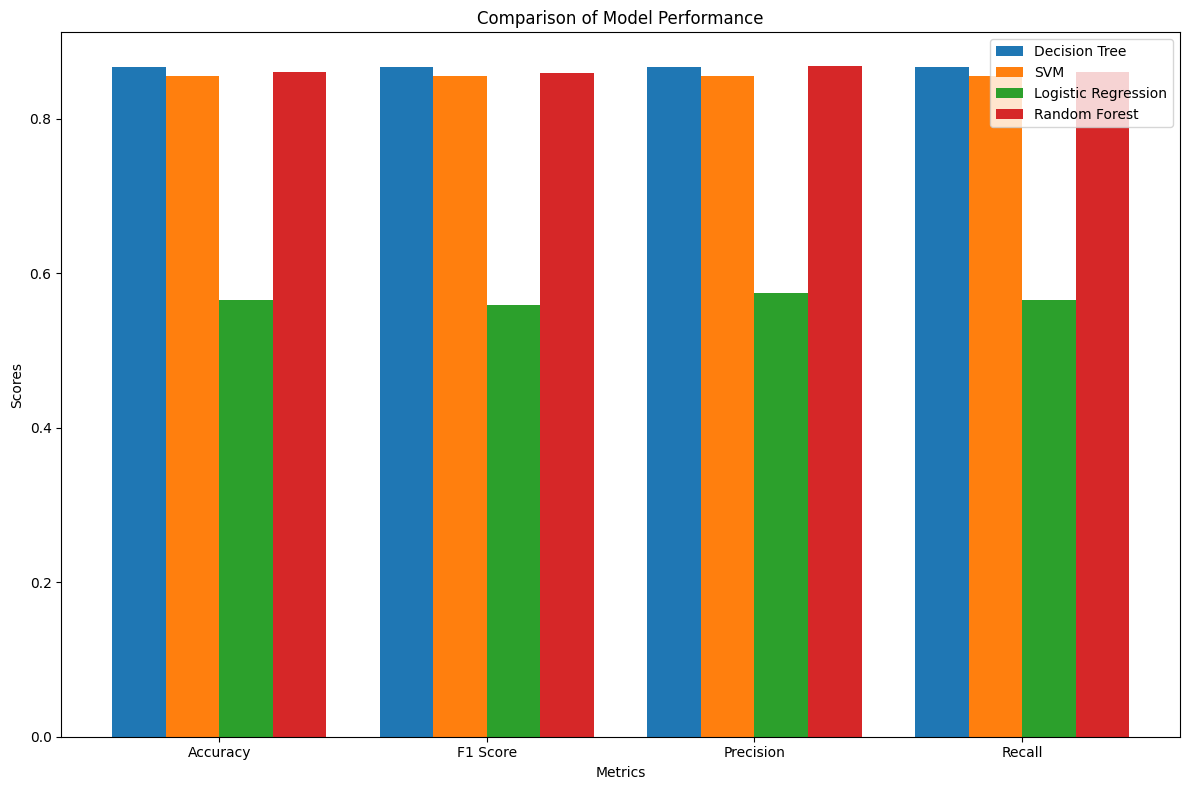

In [58]:
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 1.5*width, metrics_values[0], width, label='Decision Tree')
rects2 = ax.bar(x - 0.5*width, metrics_values[1], width, label='SVM')
rects3 = ax.bar(x + 0.5*width, metrics_values[2], width, label='Logistic Regression')
rects4 = ax.bar(x + 1.5*width, metrics_values[3], width, label='Random Forest')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()



### Interpretation:

- **Decision Tree**: performs the best overall with the highest accuracy, F1 score, and recall, indicating it correctly classifies the most instances and balances precision and recall well.
-  **Random Forest**: also performs well, especially in terms of precision, meaning it has fewer false positives.
- **SVM**: performs slightly worse than Decision Tree and Random Forest but is still strong across all metrics.
- **Logistic Regression**: has the lowest performance in all metrics, suggesting it struggles with the classification task compared to the other models.




In this laboratory, we explored several stages of data preprocessing and modeling methods for sentiment analysis on Twitter. We established an NLP processing pipeline including tokenization, stemming/lemmatization, and stop words removal. Subsequently, we encoded the data using techniques such as Word2Vec, Bag of Words, and TF-IDF. These vector representations were used to train several classification models, including SVM, Naive Bayes, Logistic Regression, and AdaBoost.

To evaluate the models, we employed standard metrics such as accuracy, loss, and F1 score, as well as the BLEU score to assess prediction quality. After analyzing the performance of each model, we selected the most effective one based on the chosen evaluation criteria.

This experience enabled us to gain a better understanding of the challenges and techniques associated with sentiment analysis in textual data, as well as the importance of selecting appropriate data representations and classification algorithms to achieve accurate and reliable results.